# Transfer Learning with fastai

## Classify fruit images into 83 kinds.

### Training set: 42,798 images (part of which will be used for validation).

### Testing set: 14,369 images.

#### Data source: https://www.kaggle.com/moltean/fruits

In [1]:
from fastai import *
from fastai.vision import *

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from os import listdir
from os.path import isfile, join
from PIL import Image
%matplotlib inline

### Path to images

In [2]:
path = Path('/home/jupyter/.fastai/data/fruits/fruits-360/')

### Some of the classes are very similar. Here we look at some of the most challenging classes to be distinguished.

In [3]:
def showExamples(ids):
    fig=plt.figure(figsize=(10, 10))
    for i,j in enumerate(ids):
        image = Image.open(pathToClass/(images[j]))
        fig.add_subplot(1,len(ids),i+1)
        plt.imshow(np.asarray(image))
        plt.axis("off")
    plt.show()

#### Cherry 1

492 training examples in this class.


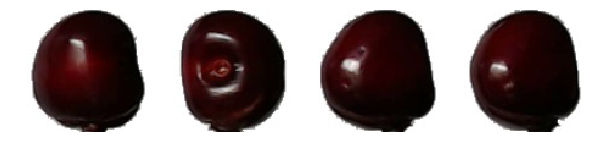

In [4]:
pathToClass = path/'Training'/'Cherry 1'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print(len(images), "training examples in this class.")
showExamples([100,200,300,400])

#### Cherry Wax Black

492 training examples in this class.


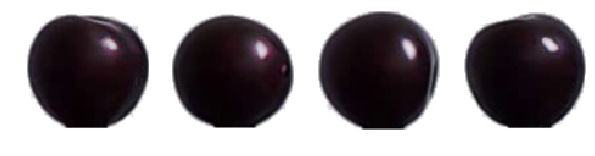

In [5]:
pathToClass = path/'Training'/'Cherry Wax Black'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print(len(images), "training examples in this class.")
showExamples([100,200,300,400])

#### Cherry Wax Red

492 training examples in this class.


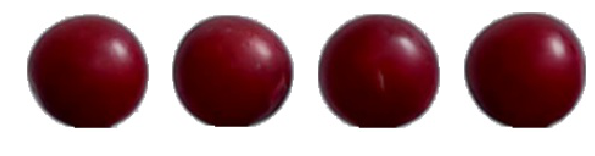

In [6]:
pathToClass = path/'Training'/'Cherry Wax Red'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print(len(images), "training examples in this class.")
showExamples([100,200,300,400])

#### Cherry 2

738 training examples in this class.


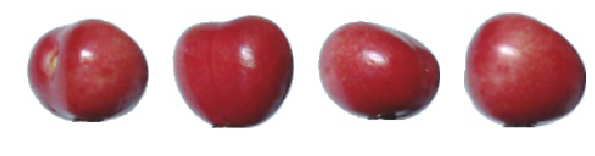

In [7]:
pathToClass = path/'Training'/'Cherry 2'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print(len(images), "training examples in this class.")
showExamples([100,200,300,400])

#### Cherry Rainier

738 training examples in this class.


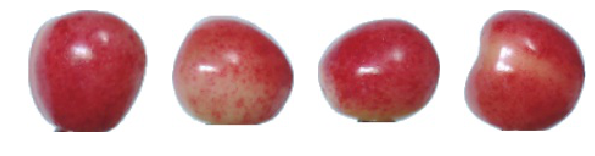

In [8]:
pathToClass = path/'Training'/'Cherry Rainier'
images = [f for f in listdir(pathToClass) if isfile(join(pathToClass, f))]
print(len(images), "training examples in this class.")
showExamples([100,200,300,400])

## Read training data

Use 40% of Training for Validation.

In [9]:
src = (ImageItemList.from_folder(path/'Training', folder='.', suffix='.jpg') 
       .random_split_by_pct(0.4)
       .label_from_folder())

data = (src.transform(get_transforms(flip_vert=True), size=100)
        .databunch().normalize(imagenet_stats))

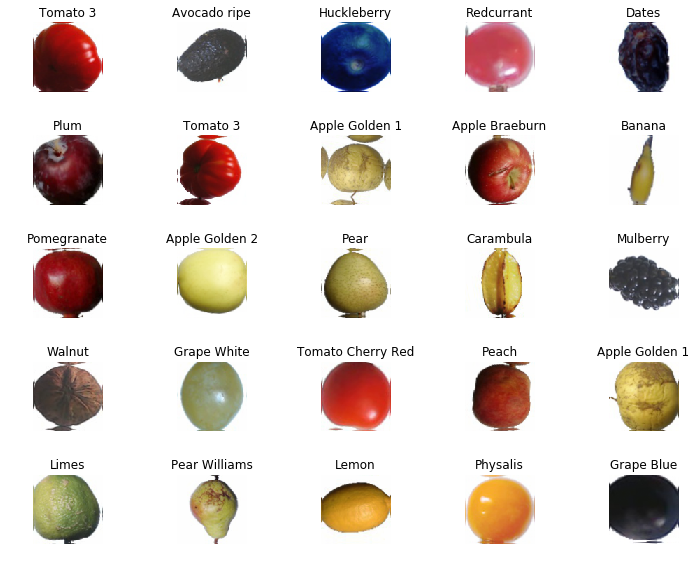

In [10]:
data.show_batch(rows=5, figsize=(10,8))

In [11]:
classes = data.classes
print("A total of", len(classes), "kinds of fruits.")
print("Classes:")
print(classes)

A total of 83 kinds of fruits.
Classes:
['Apple Braeburn', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Red', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Clementine', 'Cocos', 'Dates', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Huckleberry', 'Kaki', 'Kiwi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Peach Flat', 'Pear', 'Pear Abate', 'Pear Monster', 'Pear Williams', 'Pepino', 'Physalis', 'Physalis with Husk', 'Pineapple', 'Pineapple Mini', 'Pitahaya Red', 'Plum', 'Pomegranate', 'Qu

In [12]:
print("Number of examples in training:", len(data.train_ds))
print("Number of examples in validation:", len(data.valid_ds))

Number of examples in training: 25679
Number of examples in validation: 17119


## Learning

In [13]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [14]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate
1,0.888769,0.262362,0.046673
2,0.184363,0.041089,0.014604
3,0.117159,0.025482,0.011741
4,0.085285,0.016310,0.006426
5,0.066124,0.017780,0.007127
6,0.053809,0.012130,0.005316
7,0.033323,0.010069,0.005608
8,0.025840,0.014587,0.005433
9,0.025258,0.008907,0.005024
10,0.028200,0.008659,0.005082


#### Error rate on validation: 0.51% (accuracy 99.49%) 

In [16]:
learn.save('fruits-1')

In [17]:
#learn.load('fruits-1')

### Confusion matrix on the validation set

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

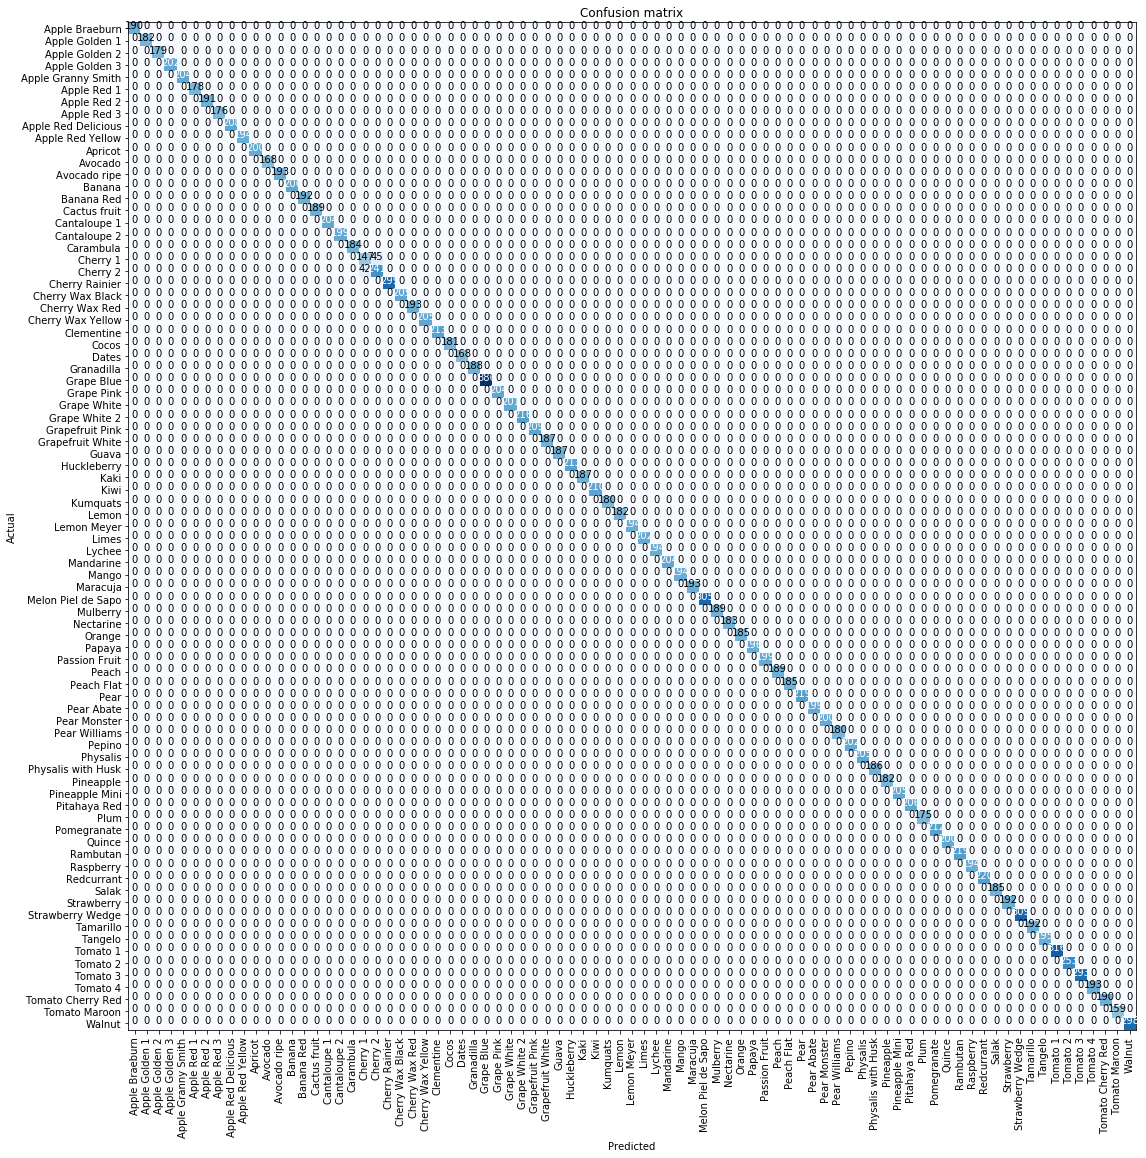

In [19]:
interp.plot_confusion_matrix(figsize=(16,16))

### The confusion matrix is virtually 0 outside of the diagonal, except for Cherry 1 and Cherry 2.

- 45 images of Cherry 1 are predicted as Cherry 2,
- 42 images of Cherry 2 are predicted as Cherry 1.

These are 87 misclassifications, which gives exactly the 87/17119 = 0.005082 error rate.

### All other classes are perfectly classified on the validation set.

### Some examples with highest loss: confusing Cherry 1 and Cherry 2

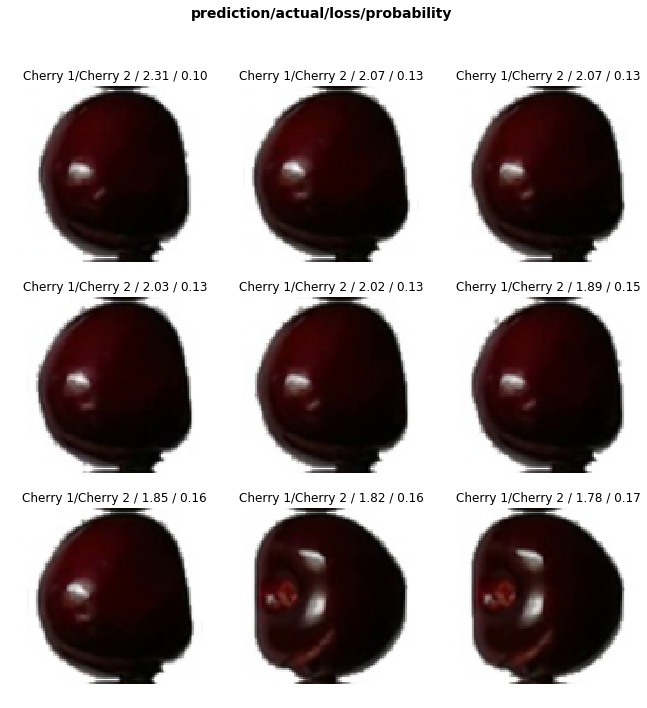

In [20]:
interp.plot_top_losses(9, figsize=(11,11))

### Closer look at the validation predictions and misclassifications 

In [21]:
pred_valid, y_valid = learn.get_preds(ds_type=DatasetType.Valid)

In [22]:
def getClasses(pred_valid, y_valid):
    '''Get the class names corresponding to true values y_valid, and the predictions in pred_valid'''
    class_estimations = []
    class_actuals = []
    for k in range(len(y_valid)):
        class_estimate = classes[np.argmax(pred_valid[k])]
        class_actual = classes[y_valid[k]]
        class_estimations.extend([class_estimate])
        class_actuals.extend([class_actual])
    return [class_estimations, class_actuals]

In [23]:
[class_estimations, class_actuals] = getClasses(pred_valid, y_valid)

In [24]:
print(class_estimations[0:4])
print(class_actuals[0:4])

['Pear Monster', 'Cherry Wax Yellow', 'Redcurrant', 'Apple Golden 1']
['Pear Monster', 'Cherry Wax Yellow', 'Redcurrant', 'Apple Golden 1']


#### Error rate in validation (just checking it matches what we got before)

In [25]:
print(1-accuracy_score(class_actuals, class_estimations))

0.00508207255096671


#### Get the classes with misclassifications

In [26]:
def get_classes_miss(class_estimations, class_actuals):
    '''Get the classes for which at least one misclassification occurred.'''
    classes_miss = []
    for k in range(len(class_actuals)):
        if class_actuals[k]!=class_estimations[k]:
            classes_miss.extend([class_actuals[k], class_estimations[k]])
    classes_miss = list(set(classes_miss))
    return classes_miss

In [27]:
classes_miss = get_classes_miss(class_estimations, class_actuals)
print(classes_miss)

['Cherry 2', 'Cherry 1']


#### Get examples where actual class had a misclassification

In [28]:
def reduce_to_miss(class_estimations, class_actuals):
    '''Restricts estimations and actuals to the cases where actual was a class with a misclassification'''
    class_estimations_reduced = []
    class_actuals_reduced = []
    for k in range(len(class_actuals)):
        if (class_actuals[k] in classes_miss)or(class_estimations[k] in classes_miss):
            class_estimations_reduced.extend([class_estimations[k]])
            class_actuals_reduced.extend([class_actuals[k]])
    return [class_estimations_reduced, class_actuals_reduced]

In [29]:
[class_estimations_reduced, class_actuals_reduced] = reduce_to_miss(class_estimations, class_actuals)

#### Confusion matrix for classes with issues 

In [30]:
cf = confusion_matrix(class_actuals_reduced, class_estimations_reduced)
print(pd.DataFrame(cf, columns=[classes_miss], index=[classes_miss]).to_string())

         Cherry 2 Cherry 1
Cherry 2      147       45
Cherry 1       42      241


#### Confusion matrix for classes with issues, normalizing by row

In [31]:
cf_norm = (cf.T/(cf.sum(axis=1))).T
print(pd.DataFrame(cf_norm, columns=[classes_miss], index=[classes_miss]).to_string())

          Cherry 2  Cherry 1
Cherry 2  0.765625  0.234375
Cherry 1  0.148410  0.851590


## Given that accuracy on validation is 99.5%, and the existing errors seem inevitable due to the similarity between Cheery 1 and Cherry 2, no further improvements are attempted.

## Now we use the model trained on 60% for the Training set, to predict on Test set.

In [32]:
src = (ImageItemList.from_folder(path, folder='.', suffix='.jpg') 
       .split_by_folder(train='Training', valid='Test')
       .label_from_folder())

data = (src.transform(get_transforms(flip_vert=True), size=100)
        .databunch().normalize(imagenet_stats))

In [33]:
print("Number of examples in testing:", len(data.valid_ds))

Number of examples in testing: 14369


In [34]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

#### Load the model already trained

In [35]:
learn.load('/home/jupyter/.fastai/data/fruits/fruits-360/Training/models/fruits-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (42798 items)
[Category Grape White, Category Grape White, Category Grape White, Category Grape White, Category Grape White]...
Path: /home/jupyter/.fastai/data/fruits/fruits-360
x: ImageItemList (42798 items)
[Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100)]...
Path: /home/jupyter/.fastai/data/fruits/fruits-360;

Valid: LabelList
y: CategoryList (14369 items)
[Category Grape White, Category Grape White, Category Grape White, Category Grape White, Category Grape White]...
Path: /home/jupyter/.fastai/data/fruits/fruits-360
x: ImageItemList (14369 items)
[Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100)]...
Path: /home/jupyter/.fastai/data/fruits/fruits-360;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, 

In [36]:
interp = ClassificationInterpretation.from_learner(learn)

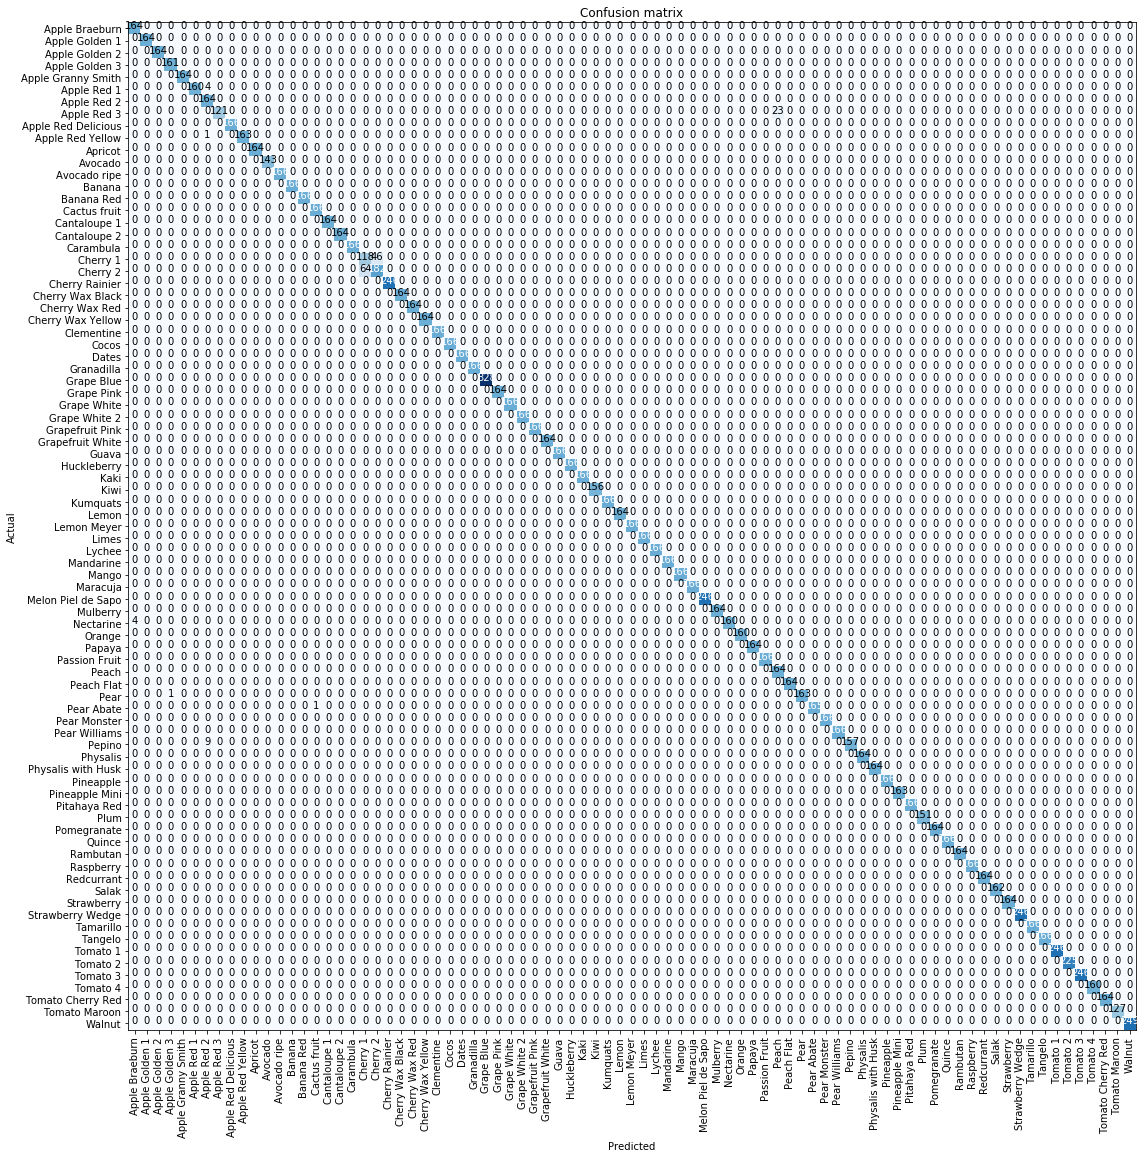

In [37]:
interp.plot_confusion_matrix(figsize=(16,16))

In [38]:
pred_test, y_test = learn.get_preds(ds_type=DatasetType.Valid)

In [39]:
[class_estimations, class_actuals] = getClasses(pred_test, y_test)

#### Error rate in Testing

In [40]:
print(1-accuracy_score(class_actuals, class_estimations))

0.010647922611176863


#### Get the classes with misclassifications in Test set

In [41]:
classes_miss = get_classes_miss(class_estimations, class_actuals)
print(classes_miss)

['Cactus fruit', 'Cherry 2', 'Pear', 'Peach', 'Apple Red Yellow', 'Apple Red 2', 'Apple Red 3', 'Pepino', 'Cherry 1', 'Apple Red 1', 'Apple Golden 3', 'Nectarine', 'Apple Braeburn', 'Pear Abate']


#### Restrict to examples that had at least a misclassification 

In [42]:
[class_estimations_reduced, class_actuals_reduced] = reduce_to_miss(class_estimations, class_actuals)

#### Confusion matrix for classes with issues 

In [44]:
cf = confusion_matrix(class_actuals_reduced, class_estimations_reduced)
print(classes_miss)
print(pd.DataFrame(cf).to_string())

['Cactus fruit', 'Cherry 2', 'Pear', 'Peach', 'Apple Red Yellow', 'Apple Red 2', 'Apple Red 3', 'Pepino', 'Cherry 1', 'Apple Red 1', 'Apple Golden 3', 'Nectarine', 'Apple Braeburn', 'Pear Abate']
     0    1    2    3    4    5    6    7    8    9    10   11   12   13
0   164    0    0    0    0    0    0    0    0    0    0    0    0    0
1     0  161    0    0    0    0    0    0    0    0    0    0    0    0
2     0    0  160    4    0    0    0    0    0    0    0    0    0    0
3     0    0    0  164    0    0    0    0    0    0    0    0    0    0
4     0    0    0    0  121    0    0    0    0    0   23    0    0    0
5     0    0    0    1    0  163    0    0    0    0    0    0    0    0
6     0    0    0    0    0    0  166    0    0    0    0    0    0    0
7     0    0    0    0    0    0    0  118   46    0    0    0    0    0
8     0    0    0    0    0    0    0   64  182    0    0    0    0    0
9     4    0    0    0    0    0    0    0    0  160    0    0    0    0
1

#### Confusion matrix for classes with issues, normalizing by row

In [47]:
cf_norm = (cf.T/(cf.sum(axis=1))).T
print(classes_miss)
print(pd.DataFrame(cf_norm).round(3).to_string())

['Cactus fruit', 'Cherry 2', 'Pear', 'Peach', 'Apple Red Yellow', 'Apple Red 2', 'Apple Red 3', 'Pepino', 'Cherry 1', 'Apple Red 1', 'Apple Golden 3', 'Nectarine', 'Apple Braeburn', 'Pear Abate']
       0      1      2      3     4      5      6     7     8      9     10     11     12     13
0   1.000  0.000  0.000  0.000  0.00  0.000  0.000  0.00  0.00  0.000  0.00  0.000  0.000  0.000
1   0.000  1.000  0.000  0.000  0.00  0.000  0.000  0.00  0.00  0.000  0.00  0.000  0.000  0.000
2   0.000  0.000  0.976  0.024  0.00  0.000  0.000  0.00  0.00  0.000  0.00  0.000  0.000  0.000
3   0.000  0.000  0.000  1.000  0.00  0.000  0.000  0.00  0.00  0.000  0.00  0.000  0.000  0.000
4   0.000  0.000  0.000  0.000  0.84  0.000  0.000  0.00  0.00  0.000  0.16  0.000  0.000  0.000
5   0.000  0.000  0.000  0.006  0.00  0.994  0.000  0.00  0.00  0.000  0.00  0.000  0.000  0.000
6   0.000  0.000  0.000  0.000  0.00  0.000  1.000  0.00  0.00  0.000  0.00  0.000  0.000  0.000
7   0.000  0.000  0.000  0.0

## An alternative (after being satisfied with performance in validation) is to re-train the model using the whole training set, and then again evaluate performance on Test set.

In [48]:
print("Number of examples in training:", len(data.train_ds))
print("Number of examples in testing:", len(data.valid_ds))

Number of examples in training: 42798
Number of examples in testing: 14369


In [51]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [52]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate
1,0.424899,0.165585,0.038973
2,0.121289,0.073968,0.029230
3,0.098154,0.035821,0.013640
4,0.059848,0.056197,0.020391
5,0.050453,0.026757,0.010926
6,0.036458,0.034250,0.015172
7,0.025289,0.018103,0.008630
8,0.022394,0.018234,0.010370
9,0.018173,0.018050,0.010091
10,0.017533,0.017875,0.010022


### Confusion matrix on the Test set

In [66]:
interp = ClassificationInterpretation.from_learner(learn)

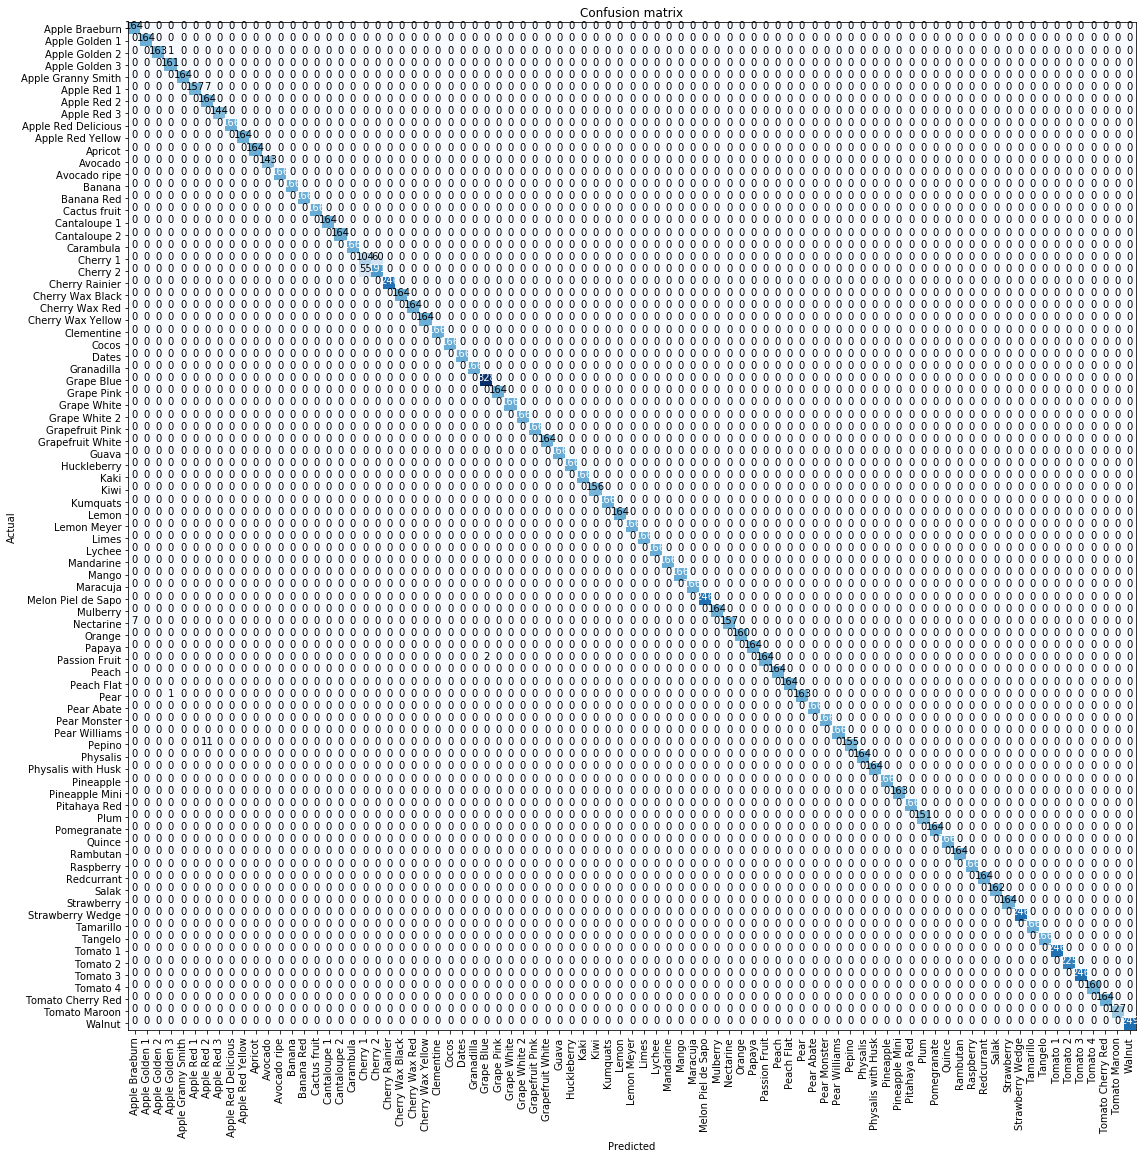

In [54]:
interp.plot_confusion_matrix(figsize=(16,16))

In [55]:
pred_test, y_test = learn.get_preds(ds_type=DatasetType.Valid)

In [56]:
[class_estimations, class_actuals] = getClasses(pred_test, y_test)

#### Error rate in Testing (just to check)

In [57]:
print(1-accuracy_score(class_actuals, class_estimations))

0.010021574222284113


#### Get the classes with misclassifications

In [58]:
classes_miss = get_classes_miss(class_estimations, class_actuals)
print(classes_miss)

['Apple Golden 2', 'Cherry 2', 'Apple Red 2', 'Grape Blue', 'Pepino', 'Cherry 1', 'Apple Red 1', 'Passion Fruit', 'Apple Golden 3', 'Nectarine', 'Apple Braeburn', 'Pear']


#### Clearly the Test set is more challenging that the Training set (or its 40% for validation), since 12 classes had a misclassification, rather than just 2 in the validation set.

### Some examples with highest loss

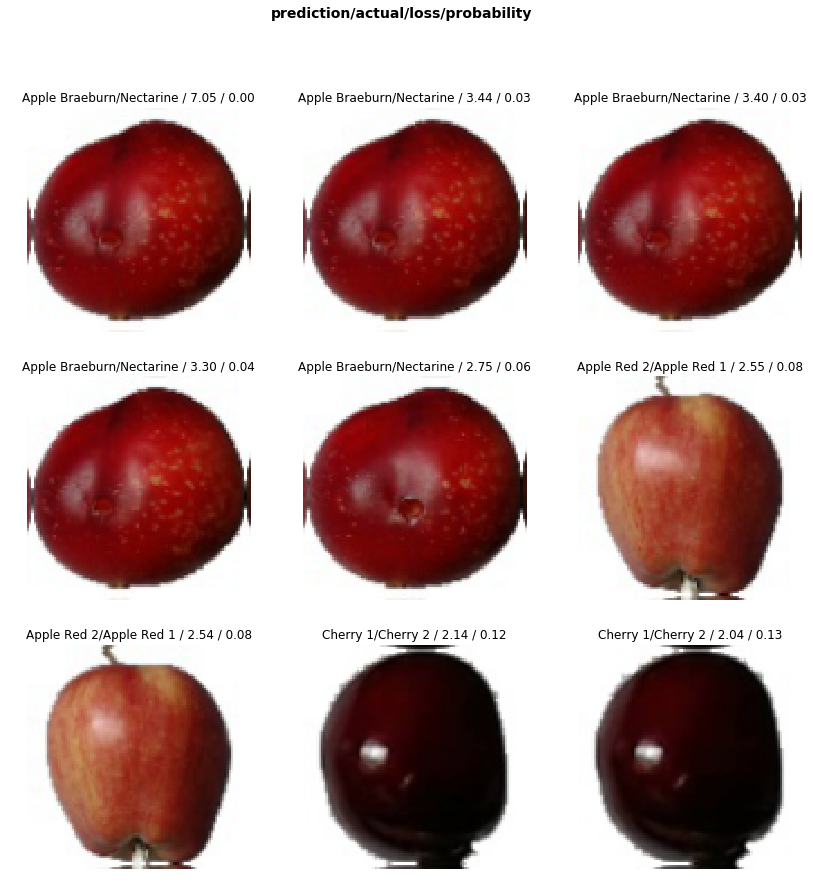

In [69]:
interp.plot_top_losses(9, figsize=(14,14))

#### Restrict to examples that had at least a misclassification

In [59]:
[class_estimations_reduced, class_actuals_reduced] = reduce_to_miss(class_estimations, class_actuals)

#### Confusion matrix for classes with issues 

In [61]:
cf = confusion_matrix(class_actuals_reduced, class_estimations_reduced)
print(classes_miss)
print(pd.DataFrame(cf).to_string())

['Apple Golden 2', 'Cherry 2', 'Apple Red 2', 'Grape Blue', 'Pepino', 'Cherry 1', 'Apple Red 1', 'Passion Fruit', 'Apple Golden 3', 'Nectarine', 'Apple Braeburn', 'Pear']
     0    1    2    3    4    5    6    7    8    9    10   11
0   164    0    0    0    0    0    0    0    0    0    0    0
1     0  163    1    0    0    0    0    0    0    0    0    0
2     0    0  161    0    0    0    0    0    0    0    0    0
3     0    0    0  157    7    0    0    0    0    0    0    0
4     0    0    0    0  164    0    0    0    0    0    0    0
5     0    0    0    0    0  104   60    0    0    0    0    0
6     0    0    0    0    0   55  191    0    0    0    0    0
7     0    0    0    0    0    0    0  328    0    0    0    0
8     7    0    0    0    0    0    0    0  157    0    0    0
9     0    0    0    0    0    0    0    2    0  164    0    0
10    0    0    1    0    0    0    0    0    0    0  163    0
11    0    0    0    0   11    0    0    0    0    0    0  155


#### Confusion matrix for classes with issues, normalizing by row

In [62]:
cf_norm = (cf.T/(cf.sum(axis=1))).T
print(classes_miss)
print(pd.DataFrame(cf_norm).round(3).to_string())

['Apple Golden 2', 'Cherry 2', 'Apple Red 2', 'Grape Blue', 'Pepino', 'Cherry 1', 'Apple Red 1', 'Passion Fruit', 'Apple Golden 3', 'Nectarine', 'Apple Braeburn', 'Pear']
       0      1      2      3      4      5      6      7      8      9      10     11
0   1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
1   0.000  0.994  0.006  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
2   0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
3   0.000  0.000  0.000  0.957  0.043  0.000  0.000  0.000  0.000  0.000  0.000  0.000
4   0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
5   0.000  0.000  0.000  0.000  0.000  0.634  0.366  0.000  0.000  0.000  0.000  0.000
6   0.000  0.000  0.000  0.000  0.000  0.224  0.776  0.000  0.000  0.000  0.000  0.000
7   0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000  0.000  0.000
8   0.043  0.000  0.000  0.000  0.000  0.000  